This example shows how to use Artap to solve a simple mathematical, single objective optimization problem.
The understanding of this problem doesn't need any physical knowledge.

Problem:
--------

A spyder, S, sits in one corner of a cuboid room, measuring 'H' by 'W' by 'L', and a fly, F, sits in the opposite
corner. By travelling on the surfaces of the room the, what is the shortest “straight line” distance from S to F?

The problem formulated as a single optimization problem, free optimization problem (without constraints)

Problem parameters are the edges of the cuboid: H, W, L

In [1]:
import pylab as pl

from artap.problem import Problem
from artap.results import Results
from artap.algorithm_scipy import ScipyOpt

class ArtapProblem(Problem):
    """
    The solution of this problem needs to find the minimum of a one parametered (x_1) goal function.
    The problem solved, by the Nelder-Mead method, therefore an initial value has to be defined, anyway it is set to 0.
    """

    def set(self):
        # wall lengths defined as global parameters
        self.H = 1.
        self.W = 1.
        self.L = 1.

        self.name = "spyder on the wall"
        self.parameters = [{'name': 'x_1', 'initial_value': 0.1, 'bounds': [0.0, 0.9]}]
        self.costs = [{'name': 'F_1'}]

    def evaluate(self, individual):
        # this function should be rewritten to define the optimization task
        # every individual contains a vector of parameters, which contains the previously defined problem parameters
        # in the given order
        x = individual.vector

        # the goal function
        F1 = (x[0] ** 2. + self.H ** 2.) ** 0.5 + ((self.W - x[0]) ** 2. + self.L ** 2.) ** 0.5

        # the evaluate function should give back a list of the calculated objective values, following the defined
        # order in set(Problem) in this case --> ['F1']
        return [F1]

In [2]:
# Optimization with Nelder-Mead
problem_nlm = ArtapProblem()

# set the optimization method
algorithm_nlm = ScipyOpt(problem_nlm)
algorithm_nlm.options['algorithm'] = 'Nelder-Mead'
algorithm_nlm.options['tol'] = 1e-3

# perform the optimization
algorithm_nlm.run()

2021-04-03 17:38:53,989 (INFO): ArtapProblem-987692 - run (33) - ScipyOpt: Nelder-Mead
2021-04-03 17:38:53,992 (INFO): ArtapProblem-987692 - run (38) - ScipyOpt: elapsed time: 0.0033445358276367188 s


In [3]:
results_nlm = Results(problem_nlm)

opt = results_nlm.find_optimum('F_1')

print('The exact value of the optimization is at x_1 = 0.5')
print('Optimal solution (Nelder-Mead):'.format(opt))

The exact value of the optimization is at x_1 = 0.5
Optimal solution (Nelder-Mead):


In [4]:
results_nlm.parameter_on_index('x_1')

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [0.1,
  0.10500000000000001,
  0.11000000000000001,
  0.11500000000000005,
  0.12500000000000008,
  0.13500000000000012,
  0.1550000000000002,
  0.17500000000000027,
  0.2150000000000004,
  0.25500000000000056,
  0.33500000000000085,
  0.41500000000000115,
  0.5750000000000017,
  0.7350000000000023,
  0.7350000000000023,
  0.49500000000000144,
  0.41500000000000115,
  0.5350000000000016,
  0.4550000000000013,
  0.5150000000000015]]

In [5]:
values = results_nlm.goal_on_parameter('x_1', 'F_1')
values

[[0.1,
  0.10500000000000001,
  0.11000000000000001,
  0.11500000000000005,
  0.12500000000000008,
  0.13500000000000012,
  0.1550000000000002,
  0.17500000000000027,
  0.2150000000000004,
  0.25500000000000056,
  0.33500000000000085,
  0.41500000000000115,
  0.5750000000000017,
  0.7350000000000023,
  0.7350000000000023,
  0.49500000000000144,
  0.41500000000000115,
  0.5350000000000016,
  0.4550000000000013,
  0.5150000000000015],
 [2.35034996681946,
  2.3475201164354225,
  2.3447252014697506,
  2.3419652601170213,
  2.3365504451291494,
  2.331275953645517,
  2.321148979543417,
  2.3115862414587647,
  2.294159787765005,
  2.2790068998764603,
  2.2555475104185896,
  2.2412377460257717,
  2.2400928901109696,
  2.275574811788584,
  2.275574811788584,
  2.2360858660436085,
  2.2412377460257717,
  2.236944516046023,
  2.2375169490934295,
  2.2362289743935437]]

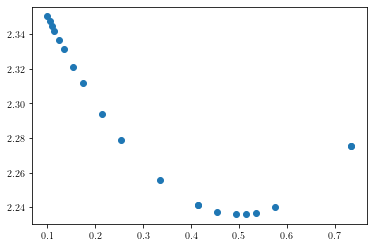

In [7]:
pl.scatter(values[0], values[1])